In [10]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [11]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
foldercheck=folder+"Covariance/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


In [12]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

#treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pSeed","abs((1/cos(atan(seed.AliExternalTrackParam.fP[3])))/seed.AliExternalTrackParam.fP[4])")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")

treeSeed.SetAlias("Unit0MC","(p0Seed-p0MC)/c00Seed")
treeSeed.SetAlias("Unit1MC","(p1Seed-p1MC)/c11Seed")
treeSeed.SetAlias("Unit2MC","(p2Seed-p2MC)/c22Seed")
treeSeed.SetAlias("Unit3MC","(p3Seed-p3MC)/c33Seed")
treeSeed.SetAlias("Unit4MC","(p4Seed-p4MC)/c44Seed")




True

# Testing the M distances between the parameters

## First the whole matrix

In [13]:
hDistance   = ROOT.TH1D( 'hDistance', 'Distance', 200, 0,25 )


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])

    
    #print(S)
    Sinv = np.linalg.inv(S)

    c = distance.mahalanobis(xMC,xSeed,Sinv)
    hDistance.Fill(c*c)
 
    

 FCN=188.383 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=6.64763e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.26078e+00   1.94563e-02   1.30716e-04  -1.61323e-02
   2  p1           1.22771e+03   1.23946e+01   8.32847e-02  -1.48332e-05


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hd
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance.png has been created


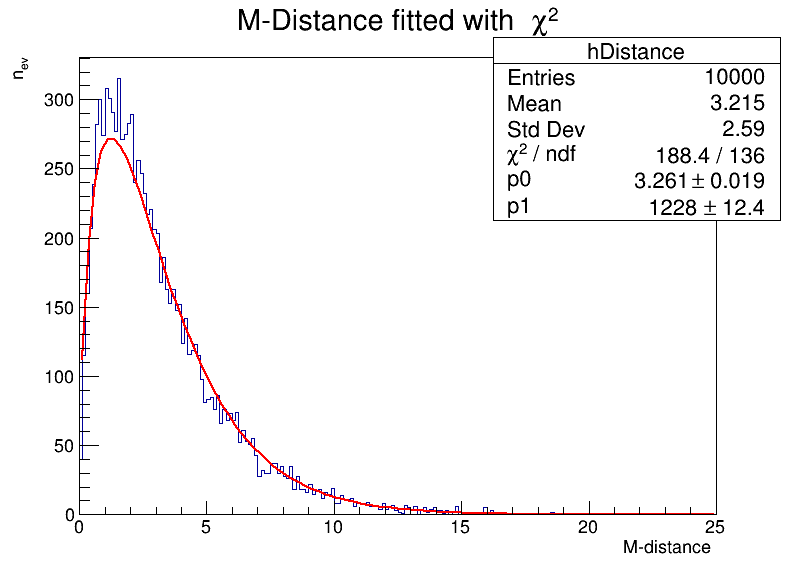

In [14]:
formula = "[1]*ROOT::Math::chisquared_pdf(x,[0])"
fchi2 = ROOT.TF1("fchi2",formula,0,25)
fchi2.SetParameters(5,10000)
  
hd = ROOT.TCanvas("hd","hd",800,600)
hDistance.SetTitle("M-Distance fitted with #chi^{2};M-distance;n_{ev}")
#fchi2.Draw()
hDistance.Draw()
hDistance.Fit("fchi2")

hd.Draw()
save=foldercheck+"MDistance"+".png"
hd.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/QQplot.png has been created


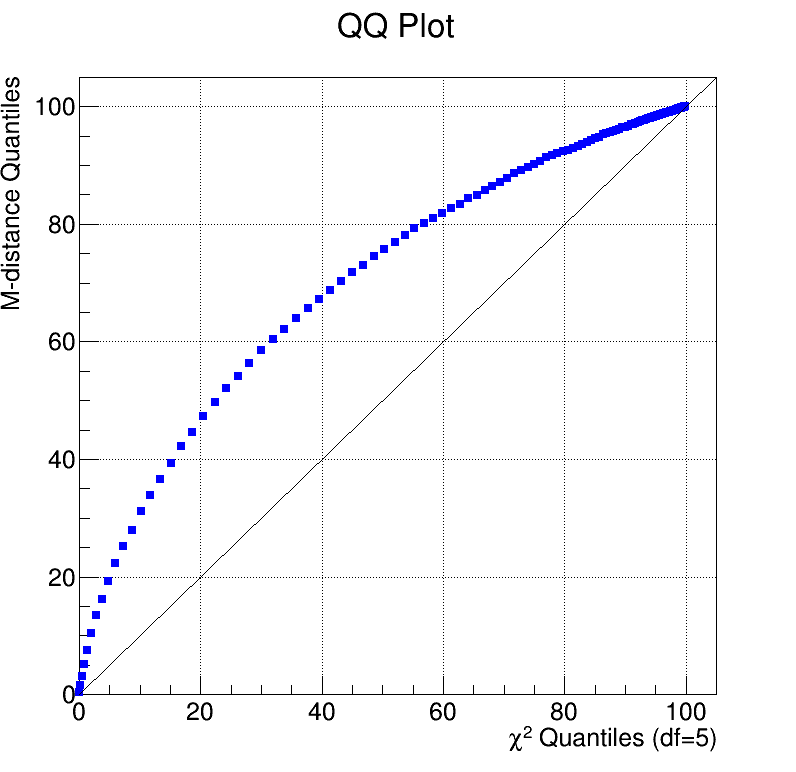

In [15]:
M_distance = array('d')
chi2_quant = array('d')

for b in range (1,hDistance.GetNbinsX()+1):
    edge = hDistance.GetBinLowEdge(b+1)
    quant = chi2.cdf(edge, 5) * 100
    integ = hDistance.Integral(1,b) / hDistance.GetEntries() * 100
    chi2_quant.append(quant)
    M_distance.append(integ)

QQ_graph = ROOT.TGraph(len(chi2_quant),chi2_quant,M_distance)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
QQ_graph.SetTitle("QQ Plot;#chi^{2} Quantiles (df=5);M-distance Quantiles")
QQ_graph.SetMarkerColor(4)
QQ_graph.SetMarkerSize(1)
QQ_graph.SetMarkerStyle(21)
QQ_graph.GetXaxis().SetLimits(0.,105.)                 # along X
QQ_graph.GetHistogram().SetMaximum(105.)   # along          
QQ_graph.GetHistogram().SetMinimum(0.)  #   Y
#fchi2.Draw()
l = ROOT.TLine(0.0,0.0,105,105)

QQ_graph.Draw("AP")
l.Draw("same")


hq.Draw()
save=foldercheck+"QQplot"+".png"
hq.Print(save)


## Now pair by pair

 FCN=113.899 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=7.11367e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.99587e+00   1.64730e-02   8.62104e-05  -7.23270e-04
   2  p1           1.23844e+03   1.24569e+01   6.51911e-02   3.34328e-08
 FCN=194.817 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=6.05627e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.15261e+00   1.35517e-02   9.00788e-05  -2.59512e-03
   2  p1           1.29757e+03   1.34699e+01   8.95359e-02  -1.30656e-07
 FCN=385.719 FROM MIGRAD    STATUS=CONVERGED      86 CALLS          87 TOTAL
                     EDM=1.18

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_01.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_02.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_12.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_03.png has been created
Info in <TCanvas::Print>: png file /home/federic

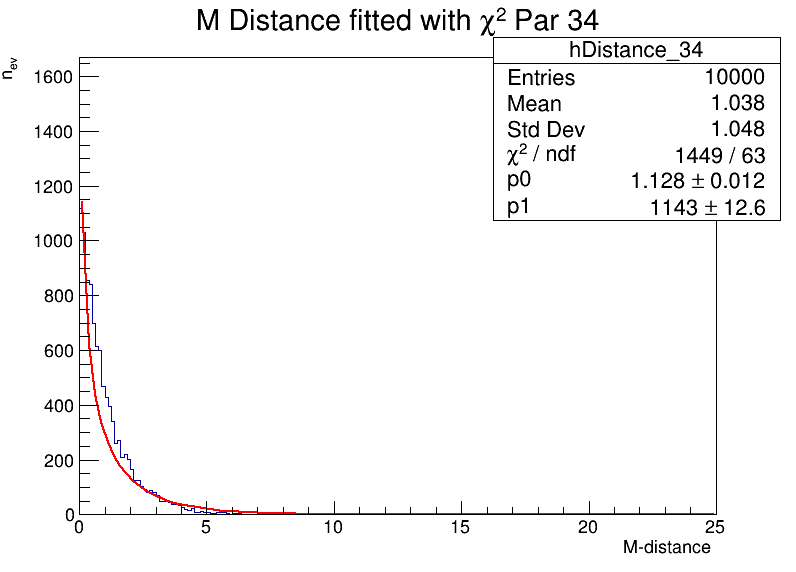

In [16]:
harray = []

for xx in range (5):
    for yy in range (xx):
        name = 'hDistance_'+str(yy)+str(xx)
        hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
        harray.append(hDistance)



for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
        for yy in range (xx):
            #print(yy,xx)
            S2 = np.array([[S[yy][yy],S[yy][xx]],
                           [S[xx][yy],S[xx][xx]]])
            #print(S2)

            xMC2 = [xMC[yy],xMC[xx]] 

            #print(xMC2)

            xSeed2 = [xSeed[yy],xSeed[xx]]

            #print(xSeed2)

            Sinv2 = np.linalg.inv(S2)

            c = distance.mahalanobis(xMC2,xSeed2,Sinv2)
            #print(harray[arraycounter])
            harray[arraycounter].Fill(c*c)
            arraycounter+=1

arraycounter = 0
for xx in range (5):
    for yy in range (xx):
        #print(harray[arraycounter])
        fname="fchi2_"+str(yy)+str(xx)
        fchi2_2 = ROOT.TF1(fname,formula,0,15)
        fchi2_2.SetParameters(5,10000)

        Canvas = "c_"+str(yy)+str(xx)
        cM = ROOT.TCanvas(Canvas,Canvas,800,600)
        Title = "M Distance fitted with #chi^{2} Par "+str(yy)+str(xx)+";M-distance;n_{ev}"
        harray[arraycounter].SetTitle(Title)
        harray[arraycounter].Draw()
        harray[arraycounter].Fit(fchi2_2)
        cM.Draw()
        save=foldercheck+"MDistance_"+str(yy)+str(xx)+".png"
        cM.Print(save)
        arraycounter+=1    
   

## Now just excluding one

 FCN=390.938 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=3.34183e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.34708e+00   1.48392e-02   1.43464e-04   4.98525e-02
   2  p1           1.20121e+03   1.22540e+01   1.18456e-01  -2.84579e-05
 FCN=494.722 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=5.87581e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.41565e+00   1.46046e-02   1.58775e-04  -2.33379e-05
   2  p1           1.18866e+03   1.21921e+01   1.32546e-01   8.44811e-08
 FCN=231.508 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=1.42

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no3.png has been created
Info in <TCanvas::Print>: png file /home/fed

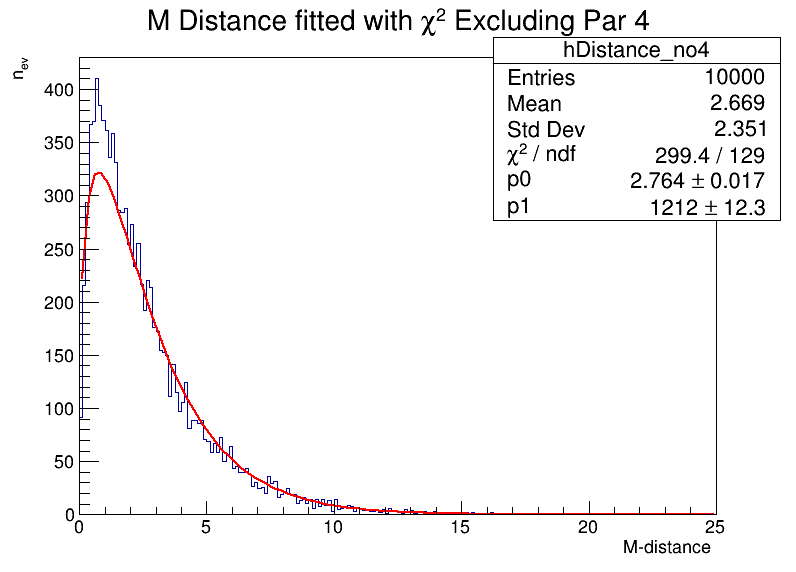

In [17]:
harray = []

for xx in range (5):
    name = 'hDistance_no'+str(xx)
    #print(name)
    hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
    harray.append(hDistance)

        
for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
    
        #print(xx)
        S4 = []
        xMC4 = []
        xSeed4 = []

        for ii in range (5):
            row = []
            for jj in range (5):
                if(ii!=xx and jj!=xx): 
                    row.append(S[ii][jj])

            if(len(row)!=0): 
                S4.append(row)

            if(ii!=xx):
                xMC4.append(xMC[ii])
                xSeed4.append(xSeed[ii])

        #print(xMC4)
        #print(xSeed4)
        #print(S4)
        
        S4inv =  np.linalg.inv(S4)       
        
        c = distance.mahalanobis(xMC4,xSeed4,S4inv)
        harray[xx].Fill(c*c)
        
for k in range (5):
    fname="fchi2_"+str(k)
    fchi2_4 = ROOT.TF1(fname,formula,0,15)
    fchi2_4.SetParameters(4,1000)

    Canvas = "c_"+str(k)
    cM = ROOT.TCanvas(Canvas,Canvas,800,600)
    Title = "M Distance fitted with #chi^{2} Excluding Par "+str(k)+";M-distance;n_{ev}"
    harray[k].SetTitle(Title)
    harray[k].Draw()
    harray[k].Fit(fchi2_4)
    cM.Draw()
    save=foldercheck+"MDistance_no"+str(k)+".png"
    cM.Print(save)
   


# Diagonal elements unit test

 FCN=73.7485 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.39567e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.16497e+02   3.93011e+00   1.34106e-02   1.49519e-05
   2  Mean         7.66891e-03   1.01328e-02   4.27077e-05   1.62251e-03
   3  Sigma        1.00204e+00   7.41156e-03   8.37861e-06   2.10869e-02
 FCN=57.4121 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=5.74335e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.19605e+02   3.93785e+00   1.19619e-02  -1.34836e-04
   2  Mean        -1.11803e-03   1.00351e-02   3.74428e-05  -9.66836e-02
   3  Sigma        9.94060e-01   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: png file /home/federico/Docu

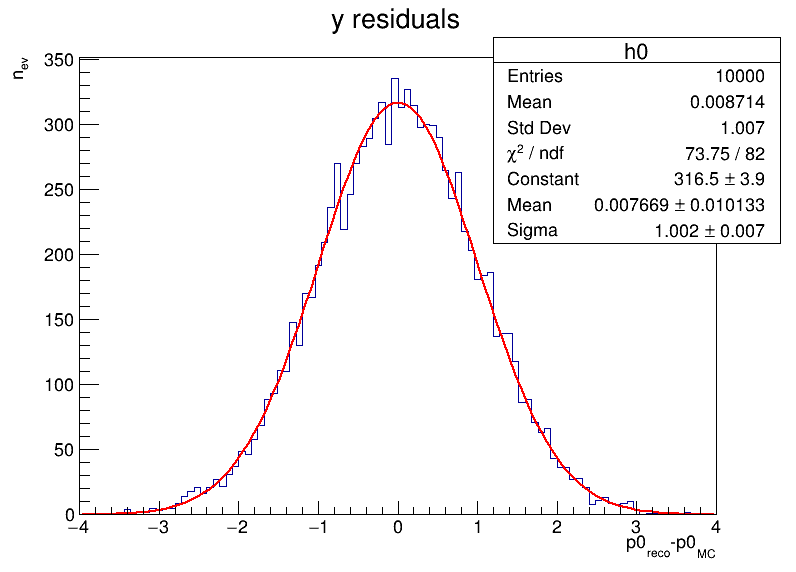

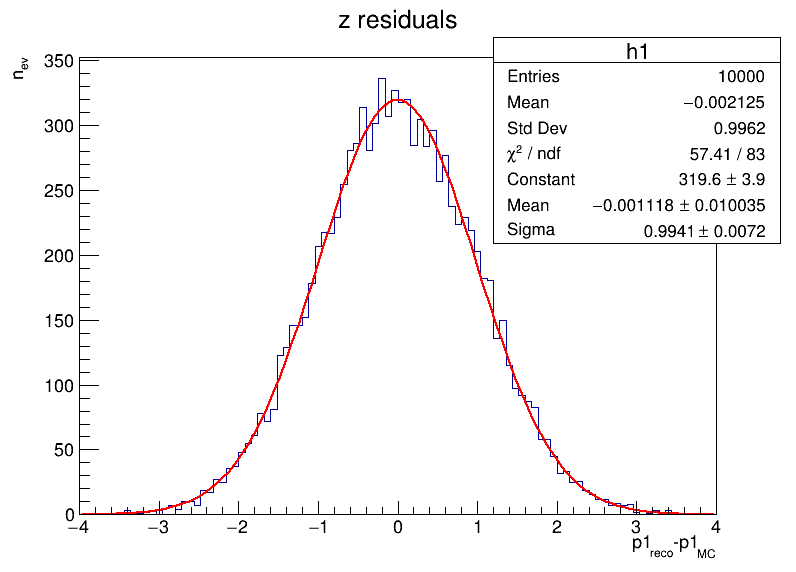

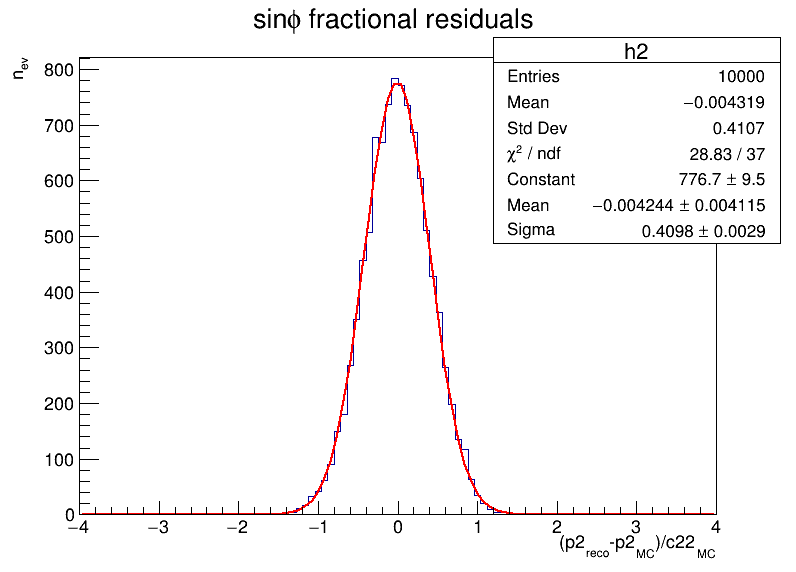

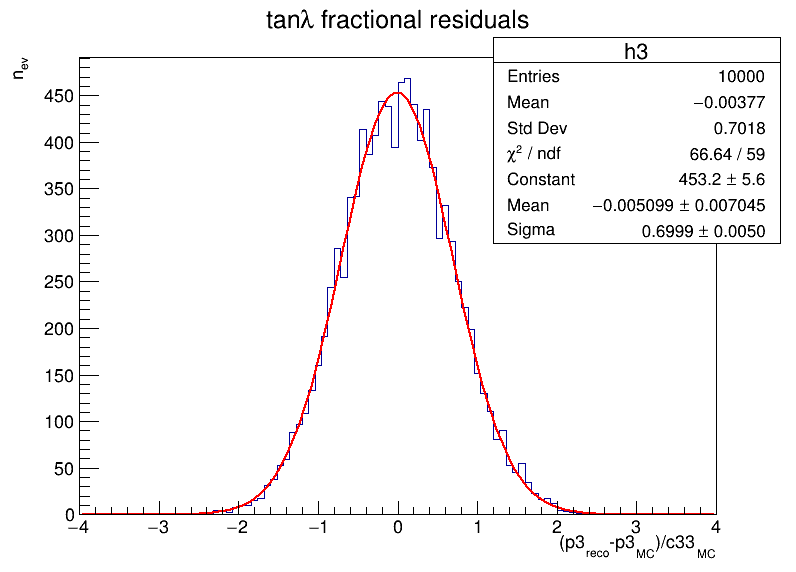

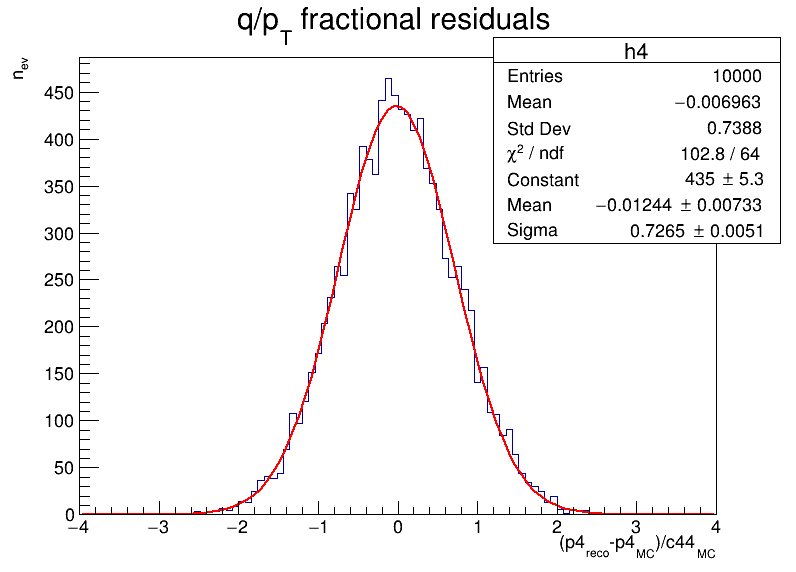

In [18]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
treeSeed.Draw("Unit0MC>>h0(100,-4,4)")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"Unit_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("Unit1MC>>h1(100,-4,4)")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"Unit_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"Unit_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Unit3MC>>h3(100,-4,4)")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"Unit_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Unit4MC>>h4(100,-4,4)")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"Unit_p4"+".png"
ch4.Print(save)